<a href="https://colab.research.google.com/github/vivekpenuli/healthcare/blob/main/sample_malaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import keras

In [43]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import cv2

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/today_train'
valid_path = '/content/drive/MyDrive/test'

In [44]:
import os

train_para_dir = os.path.join(train_path, 'parasitized')  # directory with our training cat pictures
train_un_dir = os.path.join(train_path, 'uninfected')  # directory with our training dog pictures
validation_para_dir = os.path.join(valid_path, 'parasitized')  # directory with our validation cat pictures
validation_un_dir = os.path.join(valid_path, 'uninfected')

In [45]:
num_para_tr = len(os.listdir(train_para_dir))
num_un_tr = len(os.listdir(train_un_dir))

num_para_val = len(os.listdir(validation_para_dir))
num_un_val = len(os.listdir(validation_un_dir))


total_train = num_para_tr + num_un_tr
total_val = num_para_val + num_un_val

In [46]:
print('total training parasitized images:', num_para_tr)
print('total training uninfected images:', num_un_tr)

print('total validation parasitized images:', num_para_val)
print('total validation uninfected images:', num_un_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training parasitized images: 22
total training uninfected images: 22
total validation parasitized images: 11
total validation uninfected images: 10
--
Total training images: 44
Total validation images: 21


In [47]:
BATCH_SIZE = 6  # Number of training examples to process before updating our models variables
IMG_SHAPE  = 244 

In [48]:
train_image_generator      = ImageDataGenerator(rescale=1./255)  # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255)  # Generator for our validation data

In [49]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory='/content/drive/MyDrive/today_train',
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                           class_mode='binary')

Found 44 images belonging to 2 classes.


In [50]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory='/content/drive/MyDrive/test',
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                              class_mode='binary')

Found 22 images belonging to 2 classes.


In [51]:
sample_training_images, _ = next(train_data_gen) 

In [52]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
import matplotlib.pyplot as plt

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

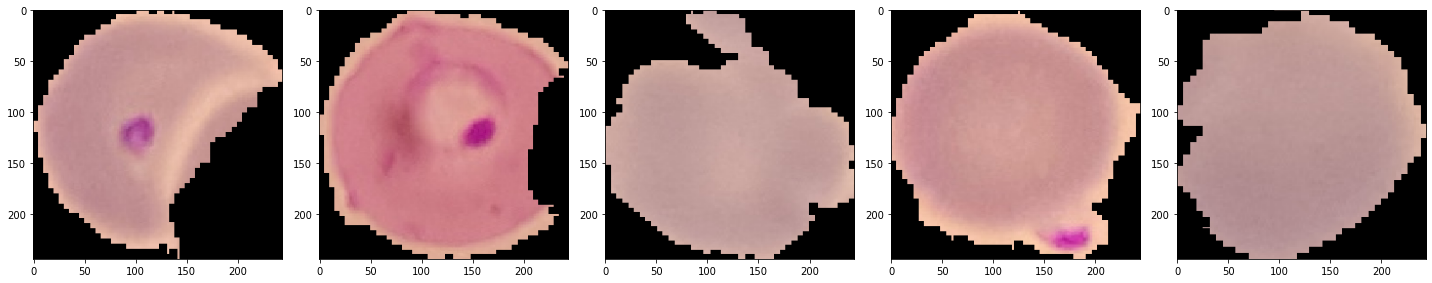

In [ ]:
plotImages(sample_training_images[:5])  # Plot images 0-4

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(244, 244, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 242, 242, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 121, 121, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 119, 119, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 59, 59, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 57, 57, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 128)       1

In [ ]:
EPOCHS = 3
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/3
8/8 [==============================] - 12s 2s/step - loss: 1.2769 - accuracy: 0.2985 - val_loss: 0.6964 - val_accuracy: 0.5000
Epoch 2/3
8/8 [==============================] - 7s 869ms/step - loss: 0.6799 - accuracy: 0.6236 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 3/3
8/8 [==============================] - 7s 862ms/step - loss: 0.6874 - accuracy: 0.7886 - val_loss: 0.6901 - val_accuracy: 0.5000


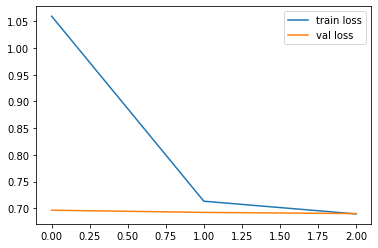

<Figure size 432x288 with 0 Axes>

In [ ]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

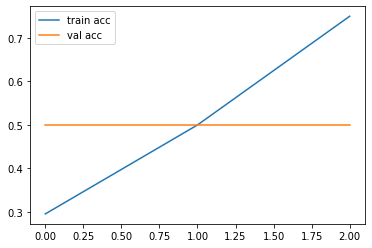

<Figure size 432x288 with 0 Axes>

In [ ]:
# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from keras.models import load_model

model.save('model_vgg19.h5')